In [1]:

import sys
import importlib
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

# def get_eucledean_dist(a, b):
#     return np.linalg.norm(
#         (a[0]-b[0], a[1]-b[1], a[2]-b[2]))

# def get_distance(u, v):
#     return get_eucledean_dist(u, v)

script_n = 'mf_rosette_locations_figure_210116_center_z'

import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]

# z_min = 15
# z_max = 35
z_min = 20
z_max = 30
# z_min = 10
# z_max = 40
x_min = 280
x_max = 600
mpd = MyPlotData()

n_rosettes = 0
for mf_id, mf in input_graph.mfs.items():
    rosette_capacities = mf.get_all_mf_locs_size()
    for rosette_loc, claw_count in rosette_capacities.items():
        x, y, z = rosette_loc
        if x < x_min*1000 or x > x_max*1000:
            continue
        if z < z_min*1000 or z > z_max*1000:
            continue
        mpd.add_data_point(
            x=x/1000-x_min,
            y=500-y/1000,
            z=z/1000,
            claw_count=claw_count,
            )
        n_rosettes += 1

print(f'Counted {n_rosettes} rosettes.')


Counted 170 rosettes.


In [13]:
n_mfs = 0
for mf_id, mf in input_graph.mfs.items():
    do_count = False
    for loc in mf.locs:
        x, y, z = loc
        if x < x_min*1000 or x > x_max*1000:
            continue
        if z < z_min*1000 or z > z_max*1000:
            continue
        do_count = True
    if do_count:
        n_mfs += 1
print(f'n_mfs = {n_mfs} ({z_min}-{z_max})')


n_mfs = 156 (20-30)


Height: 1.206896551724138, Aspect: 2.9


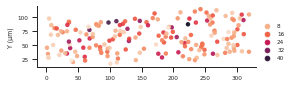

In [16]:

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(bbox_to_anchor=(1, .8), loc='upper left', frameon=False)

save_filename=f'{script_n}_xy.svg'
import seaborn as sns
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    context='paper',
    font_scale=.65,
    kind='scatter',
    x="x",
    y="y",
    s=20,
    linewidth=0,
    alpha=.9,
    aspect=2.9,
    width=3.5,
    xlim=(None, x_max-x_min+10),
    hue="claw_count",
    palette=sns.color_palette("rocket_r", as_cmap=True),
    # alpha=.9,
    save_filename=save_filename,
    y_axis_label='Y (μm)',
#     title='Mossy Fiber Rosette Locations',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


In [ ]:


save_filename=f'{script_n}_xz.svg'
import seaborn as sns
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    kind='scatter',
    x="x",
    y="z",
    aspect=3,
    width=10,
    xlim=(None, x_max-x_min+10),
#     size="claw_count",
    hue="claw_count",
    palette=sns.color_palette("rocket_r", as_cmap=True),
    # alpha=.9,
    y_axis_label='Z (μm)',
    x_axis_label='X (μm)',
    save_filename=save_filename,
    custom_legend_fn=custom_legend_fn,
    show=True,
    )
